In [66]:
import numpy as np
from emo_utils import *
import emoji
from emoji import emojize
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tesss.csv')

In [68]:
maxLen = len(max(X_train, key=lambda x: len(x.split())).split())

X_train = Sentences\
Y_train = Corresponding Emoji

In [69]:
for idx in range(10):
    print(X_train[idx], emojize(emoji_dictionary[str(Y_train[idx])], language='alias'))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


Perform One Hot Encoding\
'Heart Emoji' = ❤️ gets converted to [1,0,0,0,0], since we have 5 emoji classes for our softmax function

In [70]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

In [71]:
from emo_utils import *

In [72]:
idx = 50
print(f"Sentence '{X_train[idx]}' has label index {Y_train[idx]}, which is emoji {label_to_emoji(Y_train[idx])}", )
print(f"Label index {Y_train[idx]} in one-hot encoding format is {Y_oh_train[idx]}")

Sentence 'I missed you' has label index 0, which is emoji ❤️
Label index 0 in one-hot encoding format is [1. 0. 0. 0. 0.]


Loading GloVe Embeddings\
GloVe is intended to capture the semantic relationships between words.

In [73]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

In [74]:
word = "apple"
idx = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(idx) + "th word in the vocabulary is", index_to_word[idx])

the index of apple in the vocabulary is 57797
the 289846th word in the vocabulary is potatos


In [75]:

def sentence_to_avg(sentence, word_to_vec_map):
    

    any_word = list(word_to_vec_map.keys())[0]

    words = sentence.lower().split()

    
    avg = np.zeros(word_to_vec_map[any_word].shape)
    
    
    count = 0
    
    
    for w in words:
        # Check that word exists in word_to_vec_map
        if w in list(word_to_vec_map.keys()):
            avg += word_to_vec_map[w]
            # Increment count
            count +=1
          
    if count > 0:
        
        avg = avg/count
    
    
    
    return avg

In [97]:


def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 100):

    
    
    any_word = list(word_to_vec_map.keys())[0]
        
    
    m = Y.shape[0]                             # number of training examples
    n_y = len(np.unique(Y))                    # number of classes  
    n_h = word_to_vec_map[any_word].shape[0]   # dimensions of the GloVe vectors 
    
    
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    Y_oh = convert_to_one_hot(Y, C = n_y) 
    
    # Optimization loop
    for t in range(num_iterations): 
        
        cost = 0
        dW = 0
        db = 0
        
        for i in range(m):          # Loop over the training examples
            

            avg = sentence_to_avg(X[i], word_to_vec_map)

            
            z = np.add(np.dot(W,avg),b)
            a = softmax(z)

            
            cost += -np.sum(np.dot(Y_oh[i], np.log(a)))
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dW += np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db += dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
            
        assert type(cost) == np.float64, "Incorrect implementation of cost"
        assert cost.shape == (), "Incorrect implementation of cost"
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map) #predict is defined in emo_utils.py

    return pred, W, b

Training for 100 epochs

In [98]:
np.random.seed(1)
pred, W, b = model(X_train, Y_train, word_to_vec_map)

Epoch: 0 --- cost = 410.4336578831472
Accuracy: 0.5454545454545454


In [99]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.7954545454545454
Test set:
Accuracy: 0.6964285714285714


In [100]:
X_my_sentences = np.array(["i treasure you", "i love you", "funny lol", "lets play with a ball", "food is ready", "today is not good"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i treasure you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
today is not good 😄


(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            7    0    0    0    0    7
1            0    8    0    0    0    8
2            3    0   15    0    0   18
3            5    5    3    3    0   16
4            1    0    0    0    6    7
All         16   13   18    3    6   56


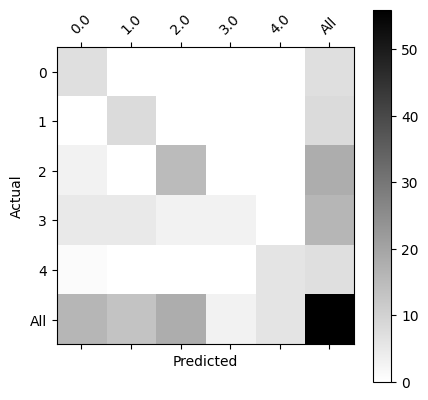

In [101]:

print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)


<h5>Using LSTMs in Keras</h5>

In [102]:
import numpy as np
import tensorflow
np.random.seed(0)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
np.random.seed(1)

In [103]:
for idx, val in enumerate(["I", "like", "learning"]):
    print(idx, val)

0 I
1 like
2 learning


In [104]:

def sentences_to_indices(X, word_to_index, max_len):
    
    m = X.shape[0]                                   # number of training examples

    X_indices = np.zeros([m,max_len])
    
    for i in range(m):                               # loop over training examples

        sentence_words = X[i].lower().split()
        
        # Initialize j to 0
        j = 0

        for w in sentence_words:
            
            if w in word_to_index:
                
                X_indices[i, j] = word_to_index[w]
                
                j =  j+1

    return X_indices

In [105]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1, word_to_index, max_len=5)
print("X1 =", X1)
print("X1_indices =\n", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices =
 [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


In [106]:


def pretrained_embedding_layer(word_to_vec_map, word_to_index):

    
    vocab_size = len(word_to_index) + 1              
    any_word = list(word_to_vec_map.keys())[0]
    emb_dim = word_to_vec_map[any_word].shape[0]    # defining dimensionality of your GloVe word vectors (= 50)
      
    #
    # Initialize the embedding matrix as a numpy array of zeros.
    
    emb_matrix = np.zeros([vocab_size,emb_dim])

    # Set each row "idx" of the embedding matrix to be 
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]

    
    # Define Keras embedding layer with the correct input and output sizes
    embedding_layer = Embedding(vocab_size, emb_dim ,trainable = False)
    
    # Build the embedding layer
    embedding_layer.build((None,)) 
    
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [107]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][1] =", embedding_layer.get_weights()[0][1][1])
print("Input_dim", embedding_layer.input_dim)
print("Output_dim",embedding_layer.output_dim)

weights[0][1][1] = 0.39031
Input_dim 400001
Output_dim 50


In [108]:

def Emojify_V2(input_shape, word_to_vec_map, word_to_index):

    sentence_indices = Input(shape=input_shape, dtype='int32')
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # Propagate sentence_indices through your embedding layer
    embeddings = embedding_layer(sentence_indices)   
    
    X = LSTM(units=128,return_sequences = True)(embeddings)
    
    X = Dropout(0.5)(X)
    
    X = LSTM(units=128,return_sequences = False)(X)
    
    X = Dropout(0.5)(X)
    
    X = Dense(5)(X)
    
    X = Activation('softmax')(X)
    
    model = Model(inputs=sentence_indices,outputs=X)
    
    return model

In [109]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding_7 (Embedding)     (None, 10, 50)            20000050  
                                                                 
 lstm_6 (LSTM)               (None, 10, 128)           91648     
                                                                 
 dropout_6 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645 

In [92]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)

In [94]:
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)

Epoch 1/50
5/5 [==============================] - 2s 13ms/step - loss: 1.5824 - accuracy: 0.2652
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 1.5207 - accuracy: 0.3485
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 1.4403 - accuracy: 0.3561
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 1.3817 - accuracy: 0.4621
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 1.2810 - accuracy: 0.5758
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 1.1486 - accuracy: 0.5530
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 1.0026 - accuracy: 0.6742
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 0.8778 - accuracy: 0.6667
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8073 - accuracy: 0.7045
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8414 - accuracy: 0.6591
Epoch 11/50
5/5 [=====================

In [95]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

2/2 [==============================] - 1s 15ms/step - loss: 0.5299 - accuracy: 0.8393

Test accuracy =  0.8392857313156128


In [96]:
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
k = 0
print('Test Sentences : ')
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num == Y_test[i] and k <= 20):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())
        k += 1

2/2 [==============================] - 2s 17ms/step
Test Sentences : 
Expected emoji:🍴 prediction: I want to eat	🍴
Expected emoji:😞 prediction: he did not answer	😞
Expected emoji:😄 prediction: he got a very nice raise	😄
Expected emoji:😄 prediction: she got me a nice present	😄
Expected emoji:😄 prediction: ha ha ha it was so funny	😄
Expected emoji:😄 prediction: he is a good friend	😄
Expected emoji:😞 prediction: I am upset	😞
Expected emoji:😄 prediction: We had such a lovely dinner tonight	😄
Expected emoji:🍴 prediction: where is the food	🍴
Expected emoji:😄 prediction: Stop making this joke ha ha ha	😄
Expected emoji:⚾ prediction: where is the ball	⚾
Expected emoji:😞 prediction: This girl is messing with me	😞
Expected emoji:😞 prediction: are you serious😞
Expected emoji:⚾ prediction: Let us go play baseball	⚾
Expected emoji:😞 prediction: This stupid grader is not working 	😞
Expected emoji:😄 prediction: Congratulation for having a baby	😄
Expected emoji:😞 prediction: stop pissing me off😞
Expect